In [2]:
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 300
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import *
import sys

sys.path.append('/home/kjetil/projects/alsvinn/build/python/')
import alsvinn
import os


import matplotlib2tikz



def showAndSave(name):
    matplotlib2tikz.save(os.path.join('../img_tikz/', name + '.tikz'),
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    
    plt.savefig(os.path.join('../img/', name + '.png'))

    plt.show()

Upgrade to   matplotlib2tikz 0.6.14    available! (installed: 0.6.1)

To upgrade matplotlib2tikz with pip, type

   pip install -U matplotlib2tikz

To upgrade _all_ pip-installed packages, type

   pipdate

To disable these checks, set SecondsBetweenChecks in /home/kjetil/.config/pipdated/config.ini to -1.


kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


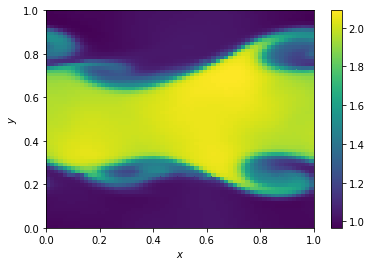

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


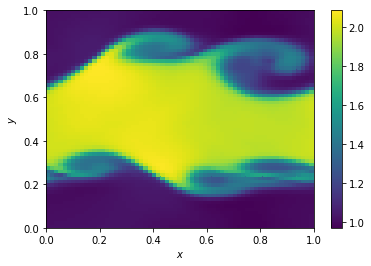

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


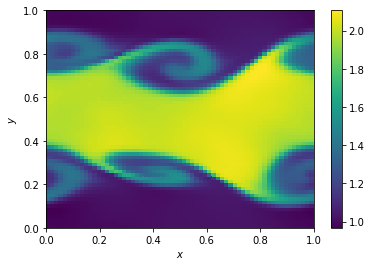

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


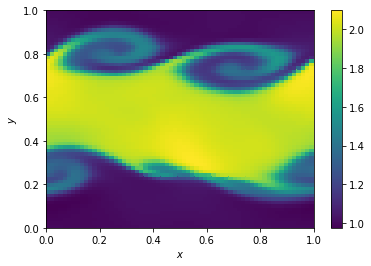

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


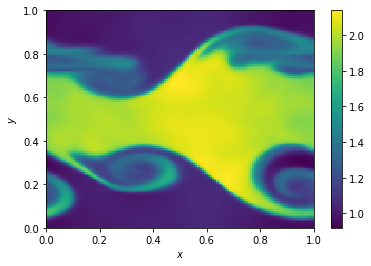

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


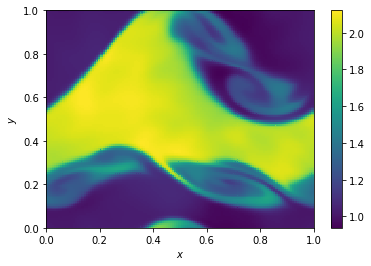

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


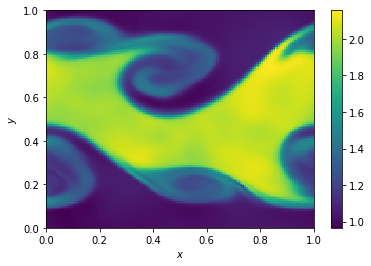

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


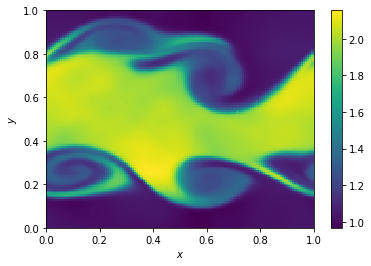

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


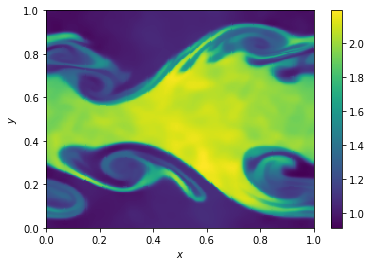

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


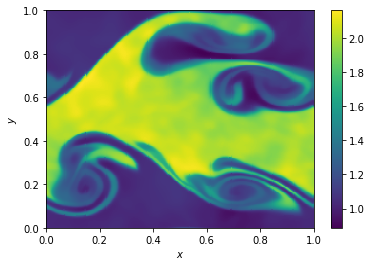

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


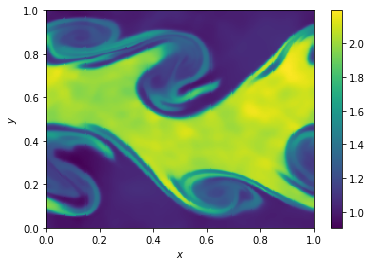

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


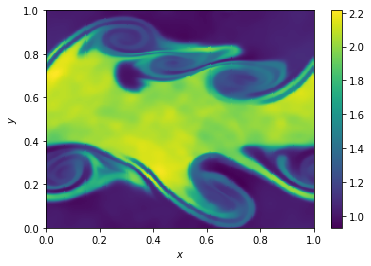

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


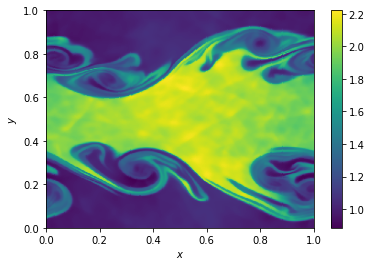

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


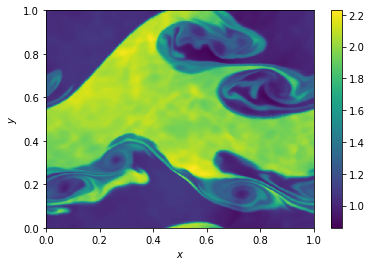

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


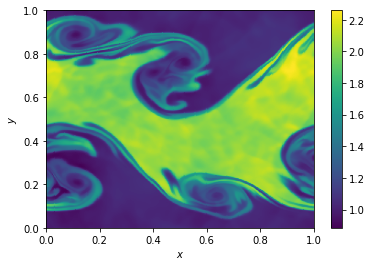

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


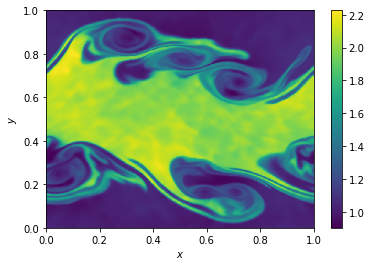

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


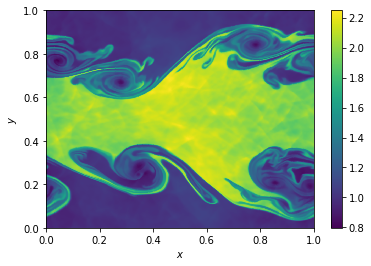

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


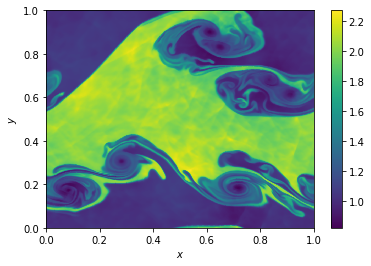

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


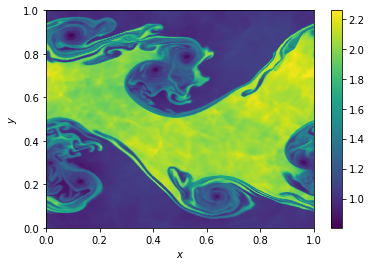

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


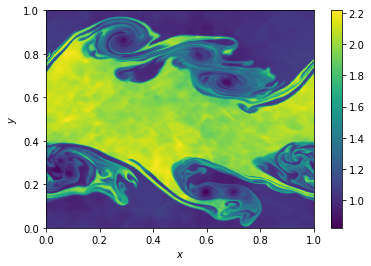

file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
\usepgfplotslibrary{plotmarks}


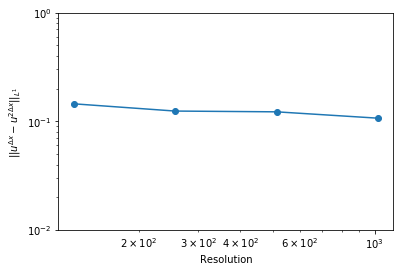

file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
\usepgfplotslibrary{plotmarks}


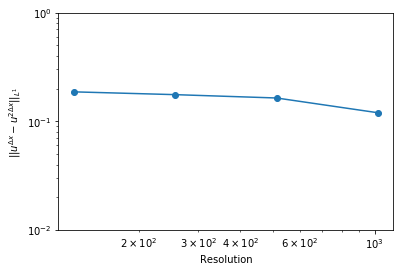

file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
\usepgfplotslibrary{plotmarks}


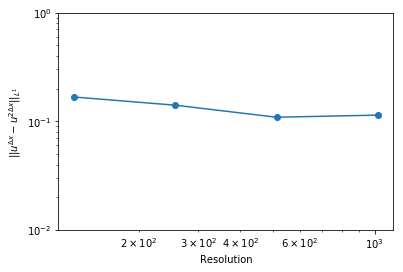

file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
\usepgfplotslibrary{plotmarks}


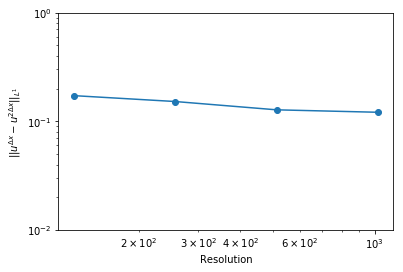

In [3]:
resolutions = [64,128,256,512,1024]
samples = 4
errors = [[] for k in range(samples)]
dataPrev = [None for k in range(samples)]
for resolution in resolutions:
    runner = alsvinn.run(name='kh', base_xml='kelvinhelmholtz/kelvinhelmholtz.xml', 
                         dimension=[resolution, resolution, 1], T=2, 
                         uq=True, number_of_saves=1, statistics=['meanvar'], samples=samples)    
    
    for sample in range(samples):
        data = runner.get_data('rho', 1, sample=sample).T
        
        x,y = mgrid[0:1:resolution*1j, 0:1:resolution*1j]
        plt.pcolormesh(x, y, data)
        plt.colorbar()
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        showAndSave('kh_single_%d_%d' % (resolution, sample))
        
        if resolution > resolutions[0]:
            errors[sample].append(sum(abs(data-dataPrev[sample]))/resolution**2)
        dataPrev[sample] = repeat(repeat(data, 2, 0), 2, 1)
for sample in range(samples):
    plt.loglog(resolutions[1:], errors[sample], '-o')
    plt.xlabel('Resolution')
    plt.ylim([1e-2,1])
    plt.ylabel('$||u^{\Delta x}-u^{2\Delta x}||_{L^1}$')
    showAndSave('kh_single_l1_convergence_%d' % sample)

file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
\usepgfplotslibrary{plotmarks}


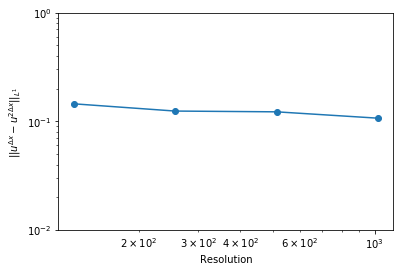

file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
\usepgfplotslibrary{plotmarks}


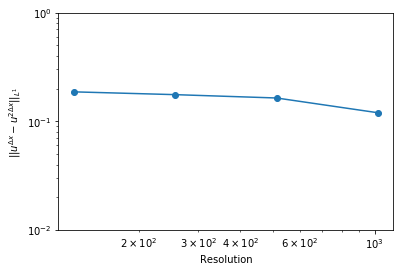

file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
\usepgfplotslibrary{plotmarks}


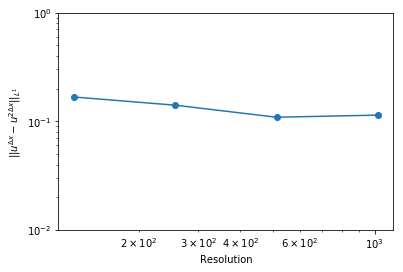

file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
\usepgfplotslibrary{plotmarks}


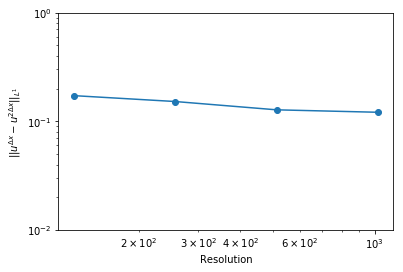

In [10]:
for sample in range(samples):
    plt.loglog(resolutions[1:], errors[sample], '-o')
    plt.xlabel('Resolution')
    plt.ylabel('$||u^{\Delta x}-u^{2\Delta x}||_{L^1}$')
    plt.ylim([1e-2,1])
    showAndSave('kh_single_l1_convergence_%d' % sample)

In [3]:
print(errors)

[0.14479147393671529, 0.12416050013403473, 0.12215436778411751, 0.10677468030267938]
